# Tutorial #1 Basic Core Usage

In [1]:
import la_forge.core as co
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import json

In [2]:
chaindir = '/Users/hazboun/software_development/la_forge/tests/data/chains/ng12p5yr_pint_be/'

In [3]:
c0 = co.Core(chaindir=chaindir,
             label='NG12.5-year Pint Bayes Ephem Tests')

In [4]:
print('Number of parameters: \t',len(c0.params))
print('Chain shape: \t\t',c0.chain.shape)
print('Burn: \t\t\t' , c0.burn)

Number of parameters: 	 102
Chain shape: 		 (6500, 102)
Burn: 			 1625


In [5]:
c0.params[:10]

['B1855+09_red_noise_gamma',
 'B1855+09_red_noise_log10_A',
 'B1953+29_red_noise_gamma',
 'B1953+29_red_noise_log10_A',
 'J0023+0923_red_noise_gamma',
 'J0023+0923_red_noise_log10_A',
 'J0030+0451_red_noise_gamma',
 'J0030+0451_red_noise_log10_A',
 'J0340+4130_red_noise_gamma',
 'J0340+4130_red_noise_log10_A']

#### Retrieve a single parameter's sample, post burn-in. 

In [6]:
c0('gw_log10_A')

array([-14.56648872, -14.56648872, -14.56648872, ..., -14.59112768,
       -14.59112768, -14.59112768])

#### Retrieve multiple parameters' samples, post burn-in. 

In [7]:
c0(['J1944+0907_red_noise_gamma',
    'J1944+0907_red_noise_log10_A',
    'J2010-1323_red_noise_gamma',
    'J2010-1323_red_noise_log10_A'])

array([[  1.25097717, -15.11251267,   4.60928109, -14.5367517 ],
       [  1.25097717, -15.11251267,   4.60928109, -14.5367517 ],
       [  1.25097717, -15.11251267,   4.60928109, -14.5367517 ],
       ...,
       [  1.59585533, -19.7683706 ,   4.99654344, -19.22860778],
       [  1.59585533, -13.91543988,   4.99654344, -19.22860778],
       [  1.59585533, -13.91543988,   4.99654344, -19.22860778]])

#### Retrieve multiple parameters' 68% credible intervals

In [8]:
c0.credint(['J1909-3744_red_noise_gamma',
            'J1909-3744_red_noise_log10_A'],
           interval=68)

array([[  0.56467805,   4.55240021],
       [-17.62162001, -13.92578082]])

#### Retrieve single parameter's 95% upper limit

In [9]:
c0.credint('gw_log10_A',interval=95,onesided=True)

-14.561571336129667

Retrieve multiple parameters' median values

In [10]:
c0.median(['J1909-3744_red_noise_gamma',
            'J1909-3744_red_noise_log10_A'])

array([  1.78939389, -14.42312396])

In [11]:
c0.median('J1909-3744_red_noise_gamma')

1.789393894714808

Set the burn in as an integer

In [12]:
c0.set_burn(600)
c0.burn

600

Set the burn in as a fraction of the chain length

In [13]:
c0.set_burn(0.5)
c0.burn

3250

Get the _maximum a postori_ index

In [14]:
c0.map_idx

2349

Get the _maximum a postori_ values

In [15]:
c0.map_params[:20]

array([  4.6528546 , -14.24849806,   2.41262458, -12.7869943 ,
         0.56952096, -13.04800569,   6.18038659, -14.97272291,
         4.94995876, -15.20737186,   1.08256527, -13.31662541,
         6.19081461, -16.02476786,   4.36074626, -16.36712724,
         0.99736931, -13.79920502,   4.5261634 , -15.47236191])

Retrieve a _maximum a postori_ dictionary and save it as a noise file.

In [16]:
with open('noise_file.json','w')as fout:
    json.dump(c0.get_map_dict(),fout)

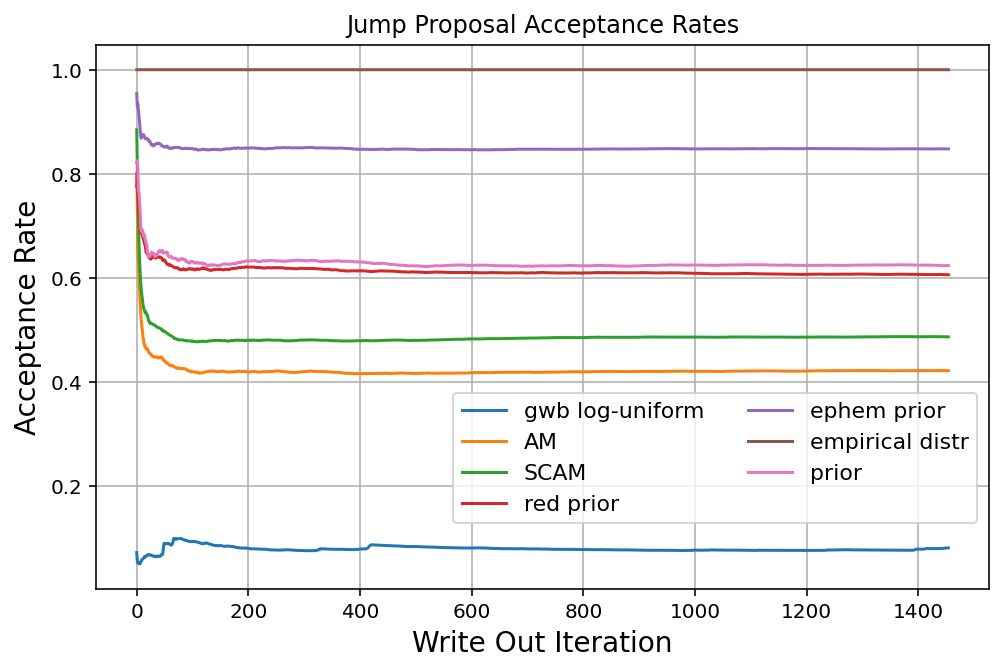

In [17]:
plt.figure(figsize=[8,5])
# L = len(c1.jumps.keys())
# half = L//2

for ii,ky in enumerate(c0.jumps.keys()):
    if ii>=9:
        ls='--'
    else:
        ls='-'
    if (ky=='jumps') or (ky=='DEJump_jump'):
        pass
    else:
        if ky[0]=='c':
            lab = 'SCAM' if 'SCAM' in ky else 'AM'
        elif ky=='DEJump_jump':
            lab = 'DEJump'
        else:
            lab = ' '.join(np.array(ky.split('_'))[2:-1])
            if 'gwb' in lab:
                lab = 'gwb log-uniform'
        if lab == 'DEJump':
            deL = c0.jumps[ky].size
            jL = c0.jumps['covarianceJumpProposalAM_jump'].size
            
            nums = np.linspace(jL-deL,jL,deL)
            plt.plot(nums,c0.jumps[ky],label=lab,ls=ls,lw=1.5)
        else:
            plt.plot(c0.jumps[ky],label=lab,ls=ls,lw=1.5)
        
plt.grid()
plt.legend(loc=[0.4,0.12],ncol=2,fontsize=11)
plt.ylabel('Acceptance Rate',fontsize=14)
plt.xlabel('Write Out Iteration',fontsize=14)
plt.title('Jump Proposal Acceptance Rates')
plt.show()

In [18]:
c0.jump_fractions

{'draw_from_red_prior': 0.071,
 'covarianceJumpProposalAM': 0.11,
 'draw_from_empirical_distr': 0.071,
 'draw_from_gwb_log_uniform_distribution': 0.071,
 'draw_from_prior': 0.036,
 'draw_from_ephem_prior': 0.071,
 'DEJump': 0.36,
 'covarianceJumpProposalSCAM': 0.21}

In [19]:
print(c0.runtime_info[:960])

system : Linux
node : compute-105.mycluster
release : 3.10.0-1160.42.2.el7.x86_64
version : #1 SMP Tue Sep 7 14:49:57 UTC 2021
machine : x86_64

enterprise_extensions v2.3.3
enterprise v3.2.1.dev30+gffe69bf,  Python v3.9.7

Signal Name                              Signal Class                   no. Parameters      
B1855+09_marginalizing_linear_timing_model TimingModel                    0                   

params:
__________________________________________________________________________________________
B1855+09_red_noise                       FourierBasisGP                 2                   

params:
B1855+09_red_noise_log10_A:Uniform(pmin=-20, pmax=-11)                                    
B1855+09_red_noise_gamma:Uniform(pmin=0, pmax=7)                         


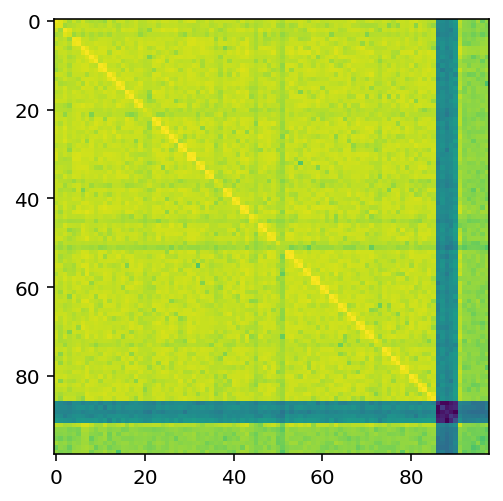

In [20]:
plt.imshow(np.log10(abs(c0.cov)))
plt.show()